In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 864x432 with 0 Axes>

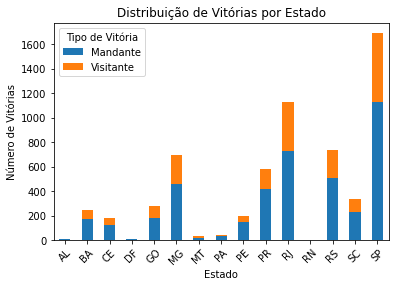

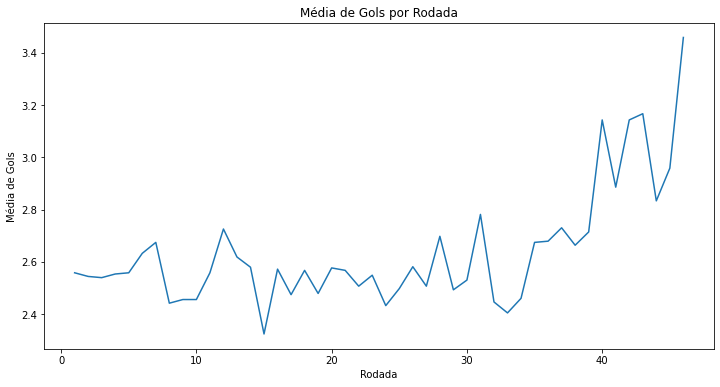

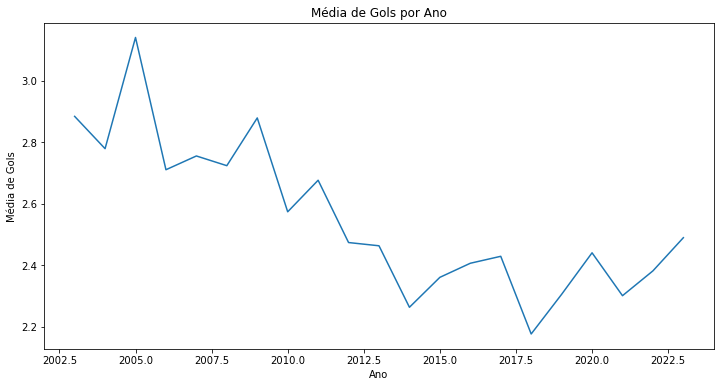

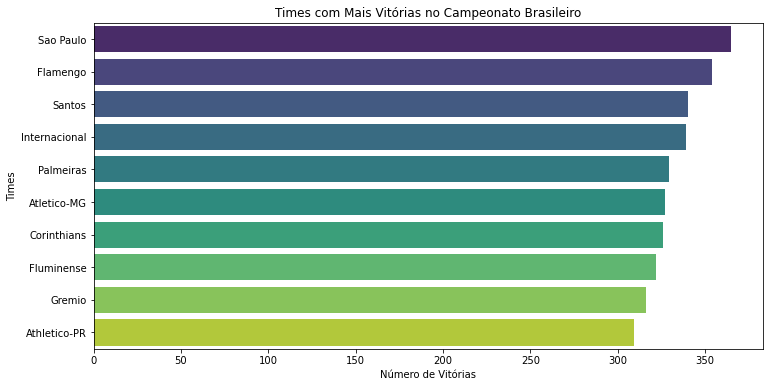

<Figure size 864x432 with 0 Axes>

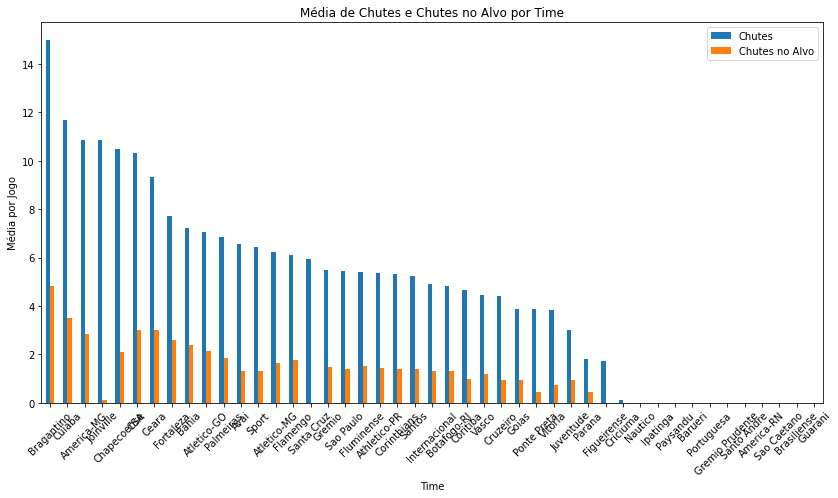

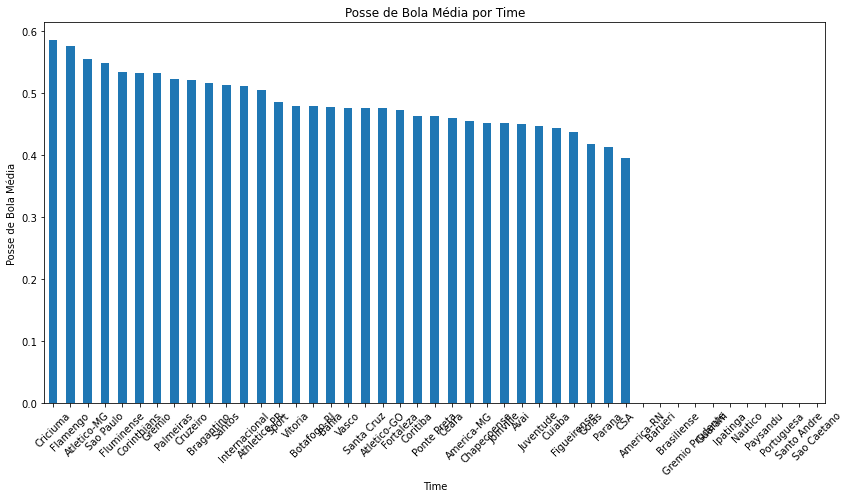

<Figure size 1008x504 with 0 Axes>

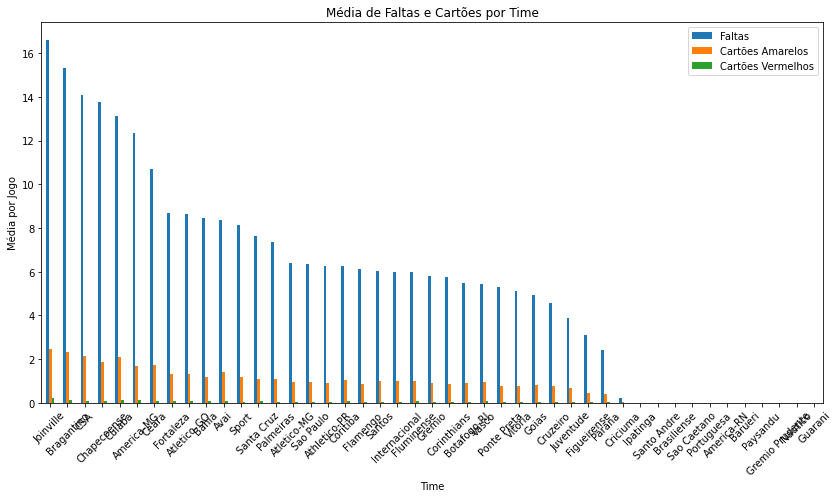

<Figure size 1008x504 with 0 Axes>

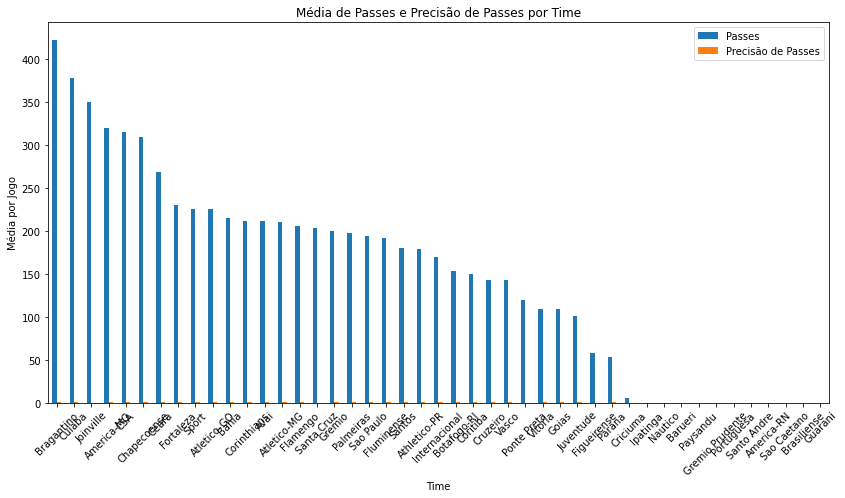

,posse_de_bola,chutes_no_alvo,passes,precisao_passes,vitorias
clube,,,,,
Athletico-PR,0.504290,1.461538,178.850000,0.809519,309
Atletico-MG,0.555355,1.630295,210.531451,0.830714,327
Corinthians,0.532828,1.388462,211.566667,0.823040,326
Cruzeiro,0.520667,0.933239,143.232955,0.816306,304
Flamengo,0.575773,1.757946,206.183374,0.846520,354
Fluminense,0.534503,1.542787,191.487775,0.833524,322
Gremio,0.531809,1.468835,200.388889,0.825106,316
Internacional,0.511607,1.302564,169.705128,0.809737,339
Palmeiras,0.522251,1.870572,197.034060,0.810664,329


In [3]:
# Carregar os arquivos CSV
file_path = r'C:\Users\gusta\OneDrive\Área de Trabalho\TCC\campeonato-brasileiro-full.csv'
file_path_new = r'C:\Users\gusta\OneDrive\Área de Trabalho\TCC\campeonato-brasileiro-estatisticas-full.csv'

df = pd.read_csv(file_path)
df_estatisticas = pd.read_csv(file_path_new)

# Limpeza e preparação dos dados
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
df['ano'] = df['data'].dt.year
df_estatisticas['posse_de_bola'] = df_estatisticas['posse_de_bola'].replace('None', 'NaN')
df_estatisticas['precisao_passes'] = df_estatisticas['precisao_passes'].replace('None', 'NaN')
df_estatisticas['posse_de_bola'] = df_estatisticas['posse_de_bola'].str.rstrip('%').astype('float') / 100.0
df_estatisticas['precisao_passes'] = df_estatisticas['precisao_passes'].str.rstrip('%').astype('float') / 100.0

# Distribuição de vitórias por estado
vitorias_mandante = df[df['vencedor'] == df['mandante']]['mandante_Estado'].value_counts()
vitorias_visitante = df[df['vencedor'] == df['visitante']]['visitante_Estado'].value_counts()
vitorias_estado = pd.DataFrame({
    'Mandante': vitorias_mandante,
    'Visitante': vitorias_visitante
}).fillna(0)
plt.figure(figsize=(12, 6))
vitorias_estado.plot(kind='bar', stacked=True)
plt.title('Distribuição de Vitórias por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Vitórias')
plt.legend(title='Tipo de Vitória')
plt.xticks(rotation=45)
plt.show()

# Média de gols por rodada
media_gols_rodada = df.groupby('rodata')[['mandante_Placar', 'visitante_Placar']].mean()
media_gols_rodada['total_gols'] = media_gols_rodada['mandante_Placar'] + media_gols_rodada['visitante_Placar']
plt.figure(figsize=(12, 6))
sns.lineplot(data=media_gols_rodada['total_gols'])
plt.title('Média de Gols por Rodada')
plt.xlabel('Rodada')
plt.ylabel('Média de Gols')
plt.show()

# Média de gols por ano
media_gols_ano = df.groupby('ano')[['mandante_Placar', 'visitante_Placar']].mean()
media_gols_ano['total_gols'] = media_gols_ano['mandante_Placar'] + media_gols_ano['visitante_Placar']
plt.figure(figsize=(12, 6))
sns.lineplot(data=media_gols_ano['total_gols'])
plt.title('Média de Gols por Ano')
plt.xlabel('Ano')
plt.ylabel('Média de Gols')
plt.show()

# Frequência de empates
empates = df[df['mandante_Placar'] == df['visitante_Placar']].shape[0]
total_partidas = df.shape[0]
percentual_empates = (empates / total_partidas) * 100
percentual_empates

# Times com mais vitórias
vitorias_times = df['vencedor'].value_counts().drop('-')
top_vitorias_times = vitorias_times.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_vitorias_times.values, y=top_vitorias_times.index, palette="viridis")
plt.title('Times com Mais Vitórias no Campeonato Brasileiro')
plt.xlabel('Número de Vitórias')
plt.ylabel('Times')
plt.show()

# Análise de chutes e chutes no alvo por time
chutes_media = df_estatisticas.groupby('clube')[['chutes', 'chutes_no_alvo']].mean()
plt.figure(figsize=(12, 6))
chutes_media.sort_values(by='chutes', ascending=False).plot(kind='bar', figsize=(14, 7))
plt.title('Média de Chutes e Chutes no Alvo por Time')
plt.xlabel('Time')
plt.ylabel('Média por Jogo')
plt.xticks(rotation=45)
plt.legend(['Chutes', 'Chutes no Alvo'])
plt.show()

# Análise de posse de bola média por time
posse_media = df_estatisticas.groupby('clube')['posse_de_bola'].mean()
plt.figure(figsize=(12, 6))
posse_media.sort_values(ascending=False).plot(kind='bar', figsize=(14, 7))
plt.title('Posse de Bola Média por Time')
plt.xlabel('Time')
plt.ylabel('Posse de Bola Média')
plt.xticks(rotation=45)
plt.show()

# Análise de faltas e cartões por time
faltas_cartoes_media = df_estatisticas.groupby('clube')[['faltas', 'cartao_amarelo', 'cartao_vermelho']].mean()
plt.figure(figsize=(14, 7))
faltas_cartoes_media.sort_values(by='faltas', ascending=False).plot(kind='bar', figsize=(14, 7))
plt.title('Média de Faltas e Cartões por Time')
plt.xlabel('Time')
plt.ylabel('Média por Jogo')
plt.xticks(rotation=45)
plt.legend(['Faltas', 'Cartões Amarelos', 'Cartões Vermelhos'])
plt.show()

# Análise de passes e precisão de passes por time
passes_media = df_estatisticas.groupby('clube')[['passes', 'precisao_passes']].mean()
plt.figure(figsize=(14, 7))
passes_media.sort_values(by='passes', ascending=False).plot(kind='bar', figsize=(14, 7))
plt.title('Média de Passes e Precisão de Passes por Time')
plt.xlabel('Time')
plt.ylabel('Média por Jogo')
plt.xticks(rotation=45)
plt.legend(['Passes', 'Precisão de Passes'])
plt.show()

# Comparação de times com melhor precisão de passes
melhor_precisao_passes = df_estatisticas.groupby('clube')['precisao_passes'].mean().sort_values(ascending=False).head(10)
comparacao_times = df_estatisticas[df_estatisticas['clube'].isin(melhor_precisao_passes.index)]
comparacao_stats = comparacao_times.groupby('clube')[['posse_de_bola', 'chutes_no_alvo', 'passes', 'precisao_passes']].mean()
vitorias_times_precisao = vitorias_times.loc[melhor_precisao_passes.index]
comparacao_stats['vitorias'] = vitorias_times_precisao
comparacao_stats
